In [1]:
%%time
import pandas as pd
df = pd.read_csv("data/sample_5000.csv")
texts = df.text[:4990]
new_texts = df.text[4990:]

from pvtm import pvtm
PVTM = pvtm.PVTM(texts, lemmatized = True)

PVTM.fit(vector_size = 30, # dimensionality of the feature vectors (Doc2Vec)
         n_components = 20, # number of Gaussian mixture components, i.e. Topics (GMM)
         epochs=30)

0.05 0.95
1367 words in the vocabulary
Start clustering..
Finished clustering.
BIC: 520876.2298649189
Wall time: 55.2 s


In [2]:
PVTM.model.window


5

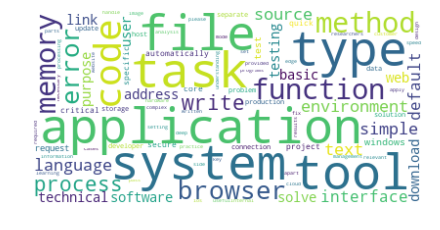

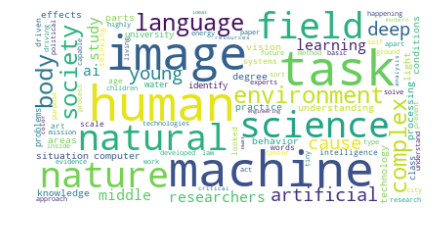

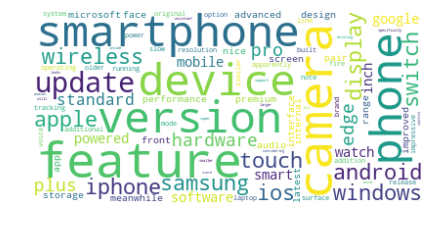

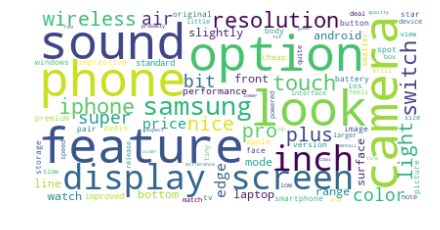

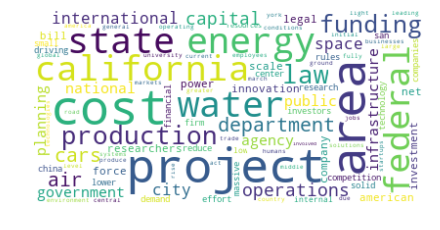

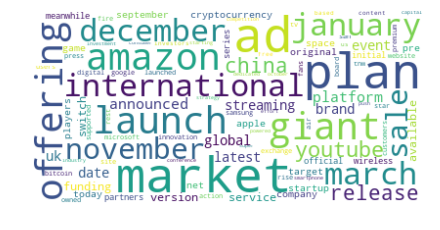

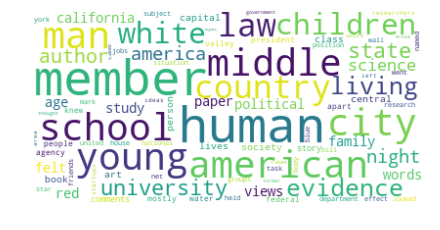

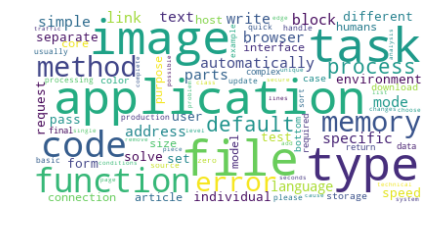

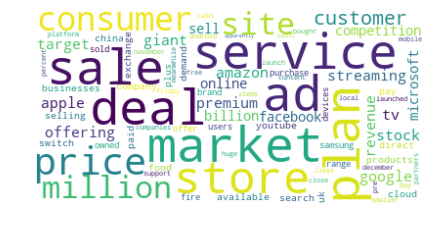

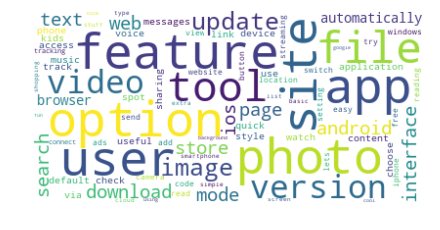

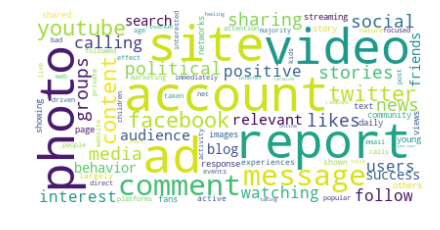

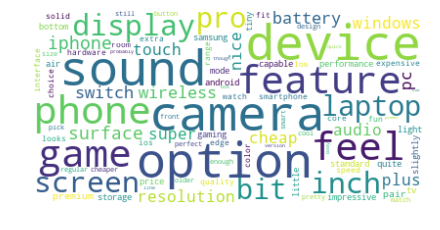

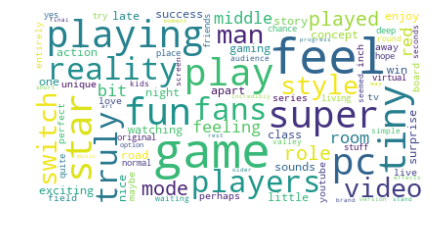

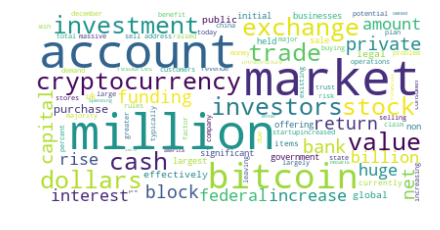

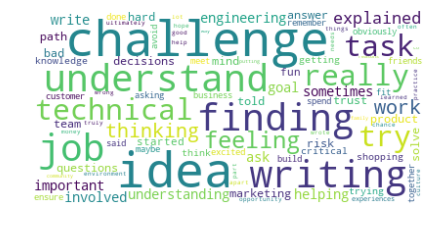

In [3]:
for i in range(15):
    PVTM.wordcloud_by_topic(i)

### Original

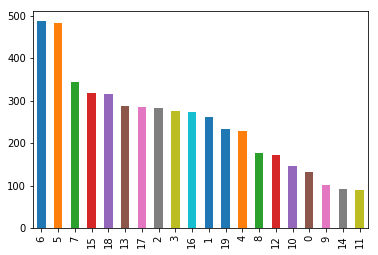

In [82]:
probs_orig = PVTM.gmm.predict(PVTM.doc_vectors)
pd.Series(probs_orig).value_counts().plot(kind="bar")

### Infered

Wall time: 6min 26s


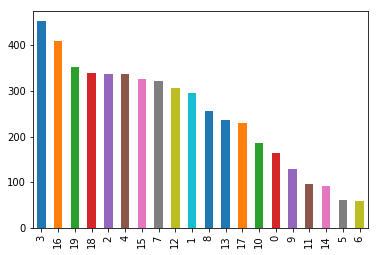

In [83]:
import numpy as np

def filter_by_vocab(text, vocab):
    return " ".join([word for word in text.split() if word in vocab])


vocab = frozenset(PVTM.tfidf.vocabulary_.keys())
cleantext = [pvtm.clean(text) for text in texts]
cleanfiltertext = [filter_by_vocab(text, vocab) for text in cleantext]
%time vecs = np.array([PVTM.model.infer_vector(text.split(), steps=150, alpha=0.025) for text in cleanfiltertext])
topics = PVTM.gmm.predict(vecs)
pd.Series(topics).value_counts().plot(kind="bar")


In [94]:
jj = []
k = 0
for i in range(1000):
    ivec = PVTM.model.infer_vector(doc_words=cleanfiltertext[i].split(), steps=20, alpha=0.025)
    new = PVTM.gmm.predict(np.mean(PVTM.doc_vectors[[j[0] for j in PVTM.model.docvecs.most_similar(positive=[ivec], topn=10)]], axis=0).reshape(1,-1))[0]
    orig = PVTM.gmm.predict(PVTM.doc_vectors[i].reshape(1,-1))[0]
    jj.append([new, orig])
    if new == orig : k+=1
        
k / i

0.7817817817817818

array([1], dtype=int64)

In [237]:
PVTM.gmm.predict(PVTM.model.infer_vector(nn.words.split(), steps=20, alpha=0.025).reshape(1,-1))

array([1], dtype=int64)

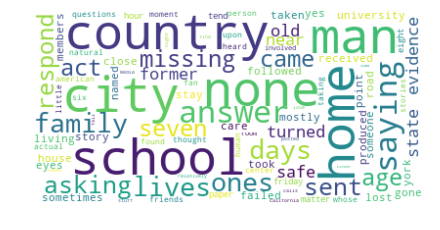

In [2]:
PVTM.wordcloud_by_topic(3)

[[0.7590657]]


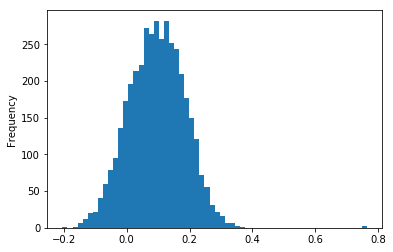

In [178]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(vec, PVTM.doc_vectors[0].reshape(1,-1)))
# print(cosine_similarity(vec2, PVTM.doc_vectors[2].reshape(1,-1)))
sims = pd.Series([cosine_similarity(vec, PVTM.doc_vectors[i].reshape(1,-1))[0][0] for i in range(4000)])
sims.plot(kind="hist", bins=60)

In [179]:
sims[sims>0.5]

0     0.759066
17    0.764154
dtype: float64

In [181]:
texts[0]

'eBay launches visual search tools that let you shop using photos from your phone or web0eBay today is launching two new visual search tools that will allow online shoppers to use photos they snap, have saved on their phone, or even those they find while browsing the web or other social networking sites, in order to find matching products from eBay’s catalog. The tools, Image Search and Find it on eBay, leverage advancements in computer vision and deep learning, including the use of neural networks, the company notes.The first tool, Image Search, allows mobile consumers to take a photo of something they want to buy or use an image saved to their phone’s Camera Roll in order to shop eBay. The website will then return listings of items that are either a close match or at least visually similar to the product you’ve photographed.While other sites, including Amazon, Pinterest, retailers like Wayfair, and even Google, also have visual search capabilities today, eBay touted that the size of 

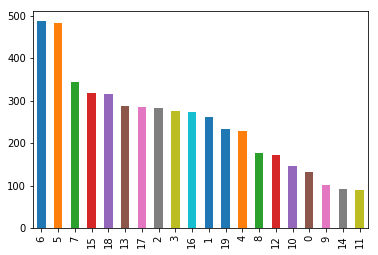

In [93]:
topics = PVTM.gmm.predict_proba(PVTM.doc_vectors).argmax(1)
pd.Series(topics).value_counts().plot(kind="bar")

best_matching_topic 16


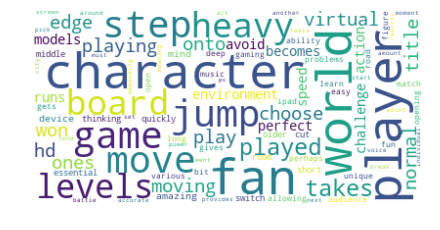

In [13]:
PVTM.search_topic_by_term(["game"], method=1, variant="sim")

In [6]:
import joblib
joblib.dump(PVTM, "pvtmmodel.pickle")

ppv = joblib.load("pvtmmodel")

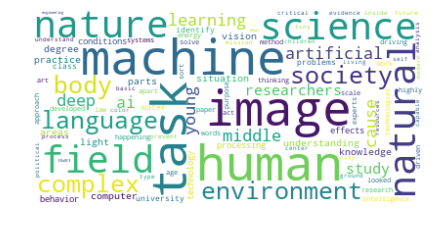

In [5]:
ppv.wordcloud_by_topic(1)

In [44]:
import pandas as pd
%time s = pd.read_csv("J:/nextcloud/istari/webai/data/sector_trainingdata.csv", sep="\t", index_col="Unnamed: 0", nrows=100000)


Wall time: 2.87 s


In [45]:
p = pvtm.PVTM(s.text.values, lemmatized=True, min_df=0.005, language="de")


0.005 0.95
7146 words in the vocabulary


In [46]:

%time p.fit(vector_size=40, n_components=10, epochs=15)

Start clustering..
Finished clustering.
BIC: 2892660.4488581833
Wall time: 7min 46s


In [39]:
p.search_topic_by_term("mitarbeiter")

AttributeError: 'list' object has no attribute 'split'

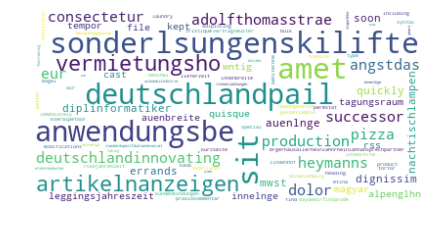

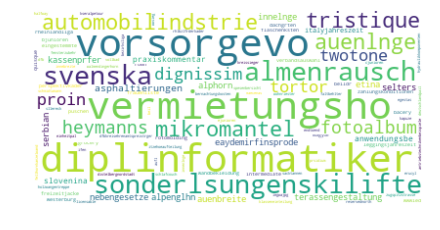

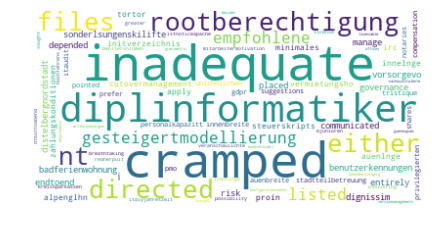

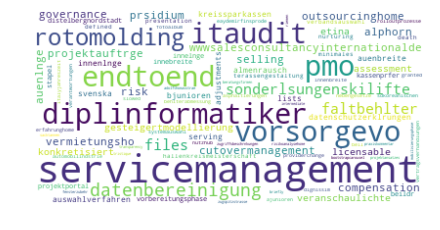

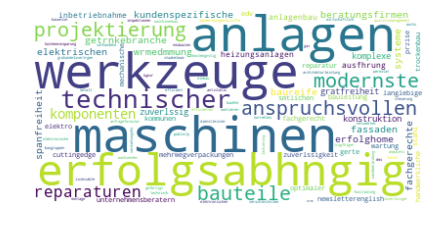

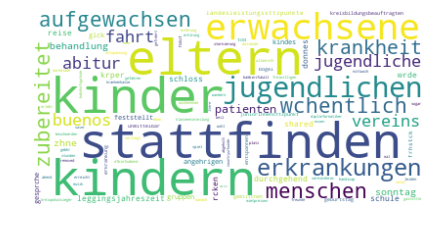

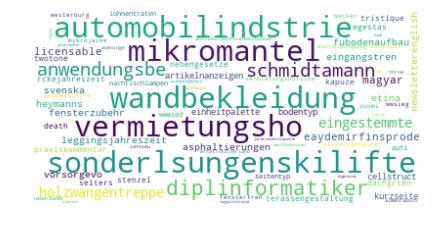

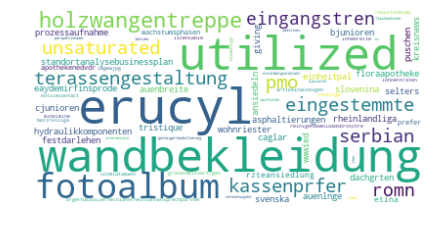

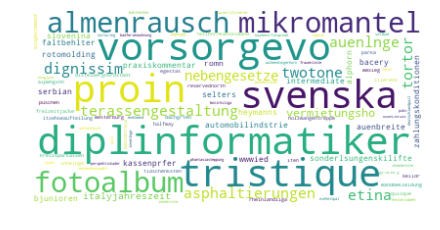

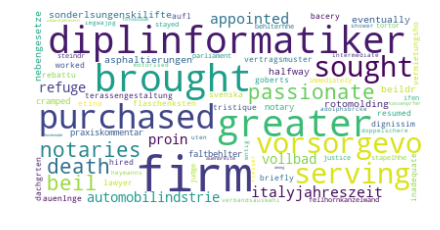

In [40]:
for i in range(10):
    p.wordcloud_by_topic(i)

In [41]:
s.label.value_counts()

35    1099
4      830
33     791
41     790
5      770
15     597
10     458
16     440
11     382
19     374
18     362
14     361
6      340
37     304
40     293
27     284
36     278
28     185
1      163
17     125
7       98
23      94
38      70
20      69
0       68
26      60
32      60
21      54
12      47
34      23
13      23
9       22
31      20
8       19
3       11
2       11
22       9
24       7
39       5
30       3
29       1
Name: label, dtype: int64

In [43]:
pd.Series(p.gmm.predict(p.doc_vectors)).value_counts()

8    3252
4    2181
5    1481
0    1024
1    1022
6     418
3     240
7     136
2     135
9     111
dtype: int64